In [60]:
import os
import numpy as np
import pandas as pd

## Data Preprocessing

### Data Sources

- Population Data: [UN Data Bank](https://population.un.org/wpp/Download/Standard/MostUsed)
- GDP Data: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?locations=PK)
- Inflation Data: [World Bank](https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG?locations=PK)
- Unemployment Data: [World Bank](https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS?locations=PK)
- Homicides Data: [World Bank](https://data.worldbank.org/indicator/VC.IHR.PSRC.P5?locations=PK)

### Data Description:
- The data contains the population, inflation, homicides, gdp, unemployment of all countries from 1950 to 2020.
- The data is in excel format.
 
We will extract all data, clean it, and merge it into a single dataframe.

### Data Cleaning

- We will remove all the columns that are not required.
- We will replace null values with Minimum value of the column, since most nulls are at the start of the data, and we can't replace them with mean or median.
- We will merge all the data into a single dataframe.
- We will remove all the rows with null values.

In [61]:
population_df = pd.read_excel('Data/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx')
gdp_df = pd.read_excel('Data/API_NY.GDP.MKTP.CD_DS2_en_excel_v2_339292.xls')
inflation_df = pd.read_excel('Data/API_FP.CPI.TOTL.ZG_DS2_en_excel_v2_340510.xls')
homicides_df = pd.read_excel('Data/API_VC.IHR.PSRC.P5_DS2_en_excel_v2_330978.xls')
unemployment_df = pd.read_excel('Data/API_SL.UEM.TOTL.ZS_DS2_en_excel_v2_337831.xls')


population_df = population_df[population_df.iloc[:,2] == 'Pakistan']
population_df = population_df.iloc[:,[10, 12, 13, 14, 16, 17, 21, 36 ]]
population_df.columns = ['Year', 'Total', 'Male', 'Female', 'Ratio', 'Median Age', 'Increase Rate', 'Life Expectancy']


gdp_df = gdp_df.iloc[[2, gdp_df[gdp_df.iloc[:, 0] == 'Pakistan'].index[0]]].T.reset_index()
gdp_df = gdp_df.iloc[:, 1:]
gdp_df.columns = ['Year', 'GDP']
gdp_df = gdp_df.iloc[4:-1]


inflation_df = inflation_df.iloc[[2, inflation_df[inflation_df.iloc[:, 0] == 'Pakistan'].index[0]]].T.reset_index()
inflation_df = inflation_df.iloc[:, 1:]
inflation_df.columns = ['Year', 'Inflation']
inflation_df = inflation_df.iloc[4:-1]


homicides_df = homicides_df.iloc[[2, homicides_df[homicides_df.iloc[:, 0] == 'Pakistan'].index[0]]].T.reset_index()
homicides_df = homicides_df.iloc[:, 1:]
homicides_df.columns = ['Year', 'Homicides']
homicides_df = homicides_df.iloc[4:-1]
    
    
unemployment_df = unemployment_df.iloc[[2, unemployment_df[unemployment_df.iloc[:, 0] == 'Pakistan'].index[0]]].T.reset_index()
unemployment_df = unemployment_df.iloc[:, 1:]
unemployment_df.columns = ['Year', 'Unemployment']
unemployment_df = unemployment_df.iloc[4:-1]
        

#### Data Transformation

In [62]:
merged_df = population_df.merge(inflation_df, on='Year', how='left')
merged_df = merged_df.merge(unemployment_df, on='Year', how='left')
merged_df = merged_df.merge(gdp_df, on='Year', how='left')
merged_df = merged_df.merge(homicides_df, on='Year', how='left')

merged_df['Homicides'] = merged_df['Homicides'].replace(np.nan, merged_df['Homicides'].min())
merged_df['Inflation'] = merged_df['Inflation'].replace(np.nan, merged_df['Inflation'].min())
merged_df['Unemployment'] = merged_df['Unemployment'].replace(np.nan, merged_df['Unemployment'].min())
merged_df['GDP'] = merged_df['GDP'].replace(np.nan, merged_df['GDP'].min())

merged_df = merged_df.iloc[10:]
merged_df.to_excel('Refined/CleanData.xlsx', index=False)

### Data Visualization

- We will visualize the data to see the trends of the data.
- We will visualize the data to see the correlation between different columns.
- We will visualize the data to see the distribution of the data.

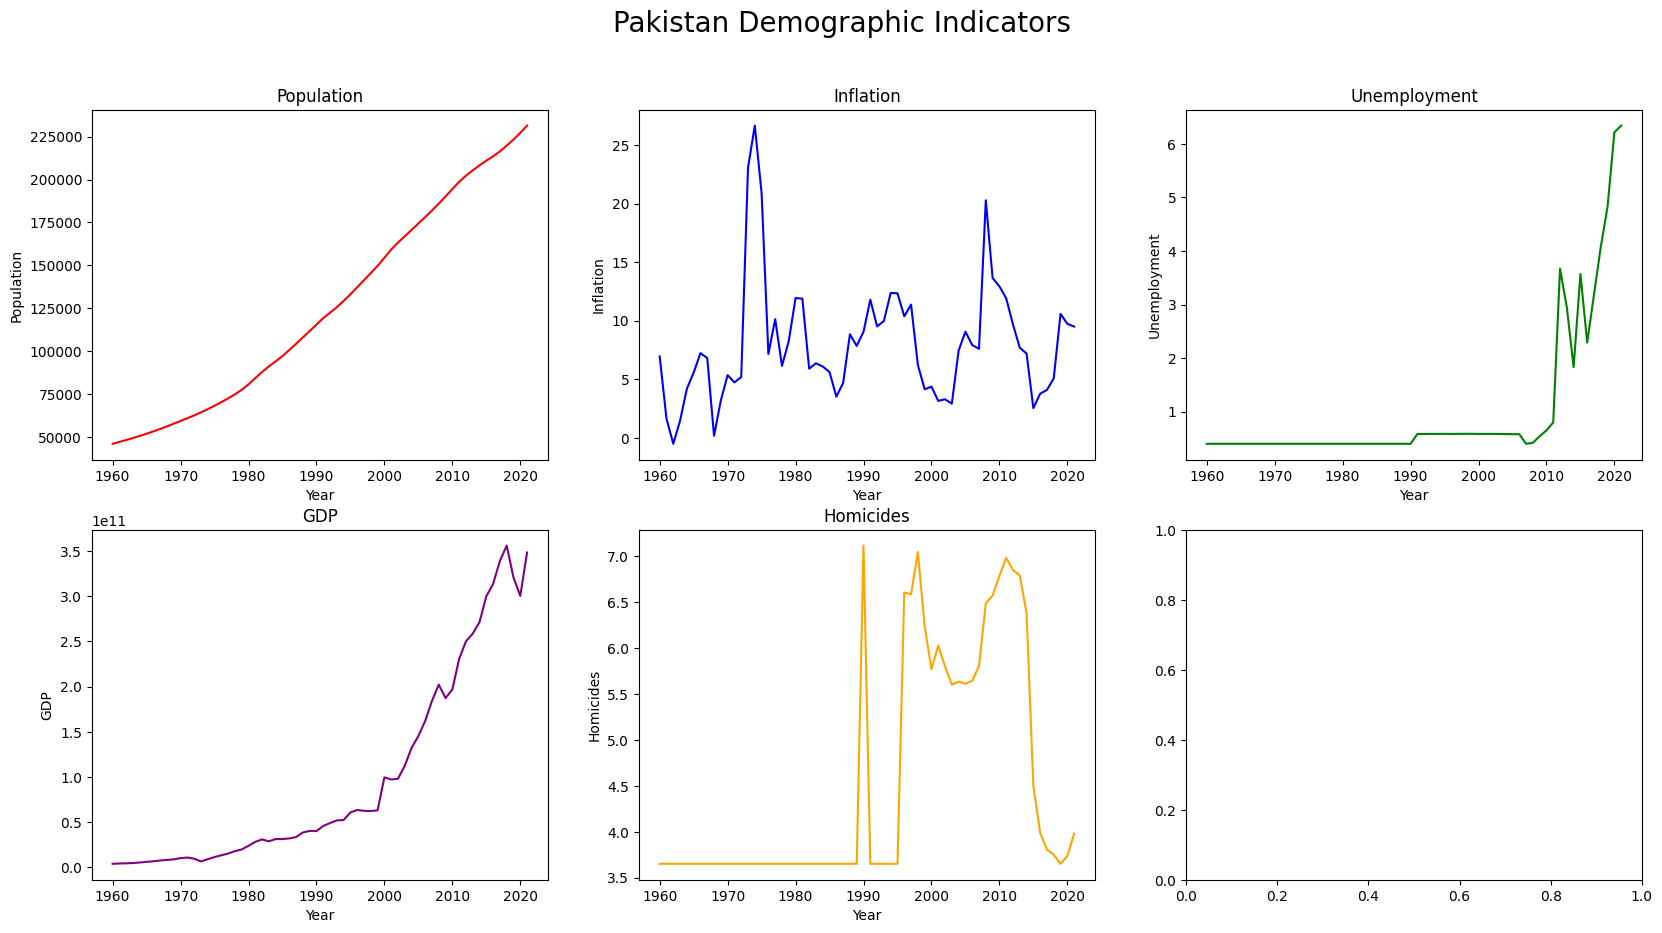

In [63]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Pakistan Demographic Indicators', fontsize=20)

ax[0, 0].plot(merged_df['Year'], merged_df['Total'], color='red')
ax[0, 0].set_title('Population')
ax[0, 0].set_ylabel('Population')
ax[0, 0].set_xlabel('Year')

ax[0, 1].plot(merged_df['Year'], merged_df['Inflation'], color='blue')
ax[0, 1].set_title('Inflation')
ax[0, 1].set_ylabel('Inflation')
ax[0, 1].set_xlabel('Year')

ax[0, 2].plot(merged_df['Year'], merged_df['Unemployment'], color='green')
ax[0, 2].set_title('Unemployment')
ax[0, 2].set_ylabel('Unemployment')
ax[0, 2].set_xlabel('Year')

ax[1, 0].plot(merged_df['Year'], merged_df['GDP'], color='purple')
ax[1, 0].set_title('GDP')
ax[1, 0].set_ylabel('GDP')
ax[1, 0].set_xlabel('Year')

ax[1, 1].plot(merged_df['Year'], merged_df['Homicides'], color='orange')
ax[1, 1].set_title('Homicides')
ax[1, 1].set_ylabel('Homicides')
ax[1, 1].set_xlabel('Year')

plt.show()


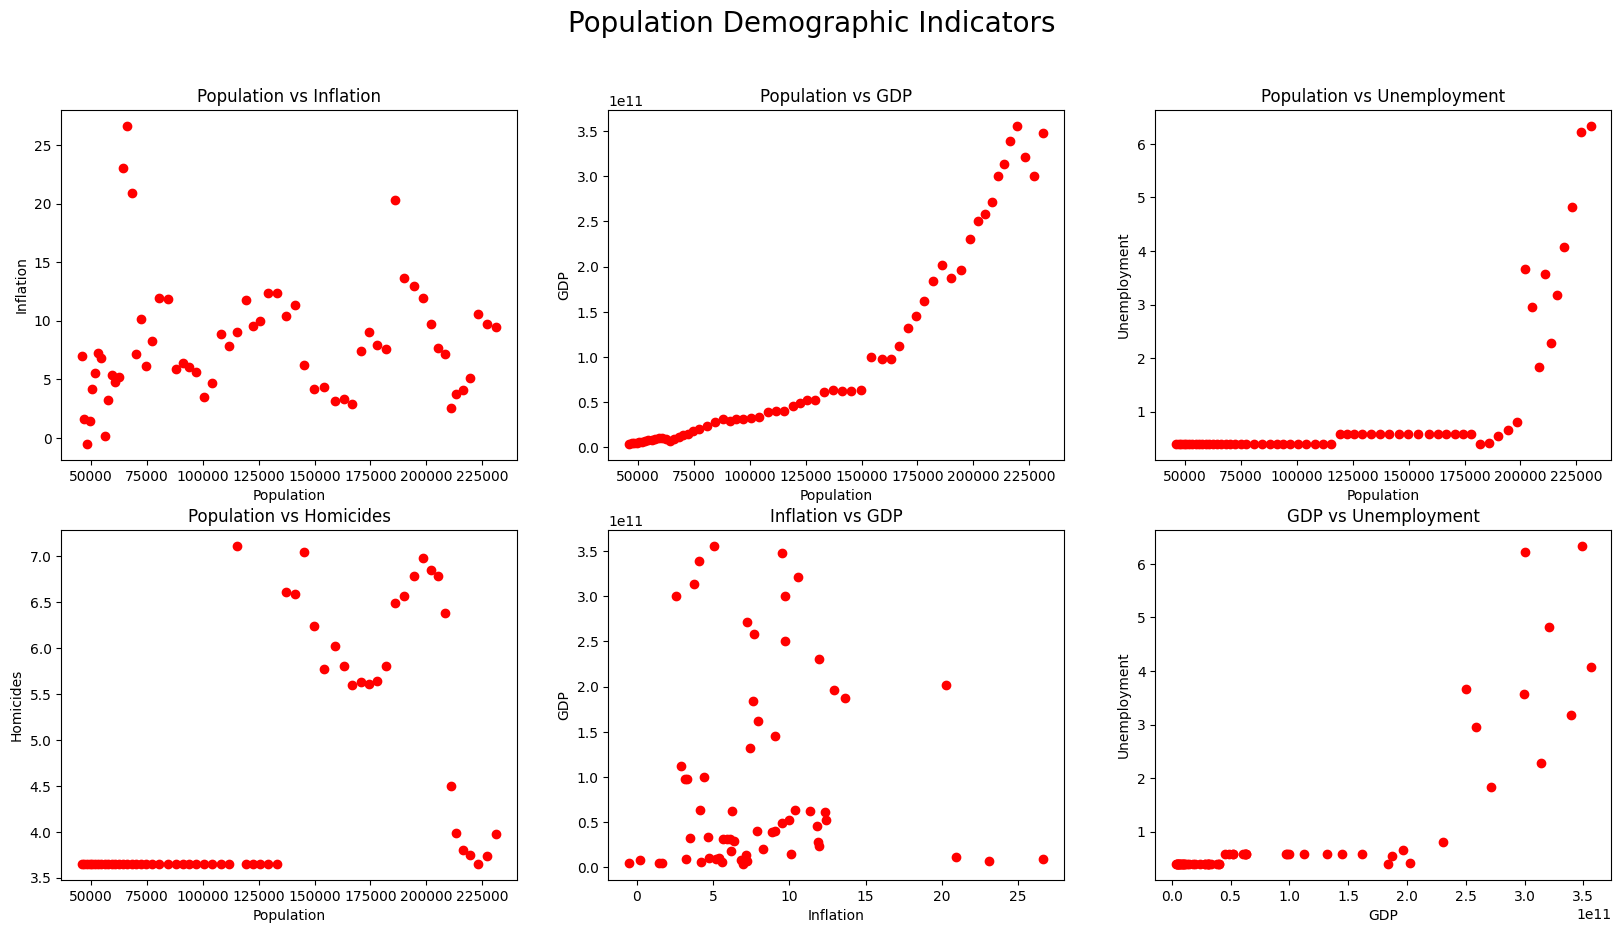

In [83]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Population Demographic Indicators', fontsize=20)

ax[0, 0].scatter(merged_df['Total'], merged_df['Inflation'], color='red')
ax[0, 0].set_title('Population vs Inflation')
ax[0, 0].set_ylabel('Inflation')
ax[0, 0].set_xlabel('Population')

ax[0, 1].scatter(merged_df['Total'], merged_df['GDP'], color='red')
ax[0, 1].set_title('Population vs GDP')
ax[0, 1].set_ylabel('GDP')
ax[0, 1].set_xlabel('Population')

ax[0, 2].scatter(merged_df['Total'], merged_df['Unemployment'], color='red')
ax[0, 2].set_title('Population vs Unemployment')
ax[0, 2].set_ylabel('Unemployment')
ax[0, 2].set_xlabel('Population')

ax[1, 0].scatter(merged_df['Total'], merged_df['Homicides'], color='red')
ax[1, 0].set_title('Population vs Homicides')
ax[1, 0].set_ylabel('Homicides')
ax[1, 0].set_xlabel('Population')

ax[1, 1].scatter(merged_df['Inflation'], merged_df['GDP'], color='red')
ax[1, 1].set_title('Inflation vs GDP')
ax[1, 1].set_ylabel('GDP')
ax[1, 1].set_xlabel('Inflation')

ax[1, 2].scatter(merged_df['GDP'], merged_df['Unemployment'], color='red')
ax[1, 2].set_title('GDP vs Unemployment')
ax[1, 2].set_ylabel('Unemployment')
ax[1, 2].set_xlabel('GDP')


plt.show()
plt.show()

In [86]:
# frequent itemset mining

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

merged_df = pd.read_excel('Refined/CleanData.xlsx')

merged_df['Total'] = pd.cut(merged_df['Total'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
merged_df['Inflation'] = pd.cut(merged_df['Inflation'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
merged_df['Unemployment'] = pd.cut(merged_df['Unemployment'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
merged_df['GDP'] = pd.cut(merged_df['GDP'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
merged_df['Homicides'] = pd.cut(merged_df['Homicides'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

merged_df


# merged_df = merged_df.drop('Year', axis=1)

# merged_df = pd.get_dummies(merged_df)

# frequent_itemsets = apriori(merged_df, min_support=0.1, use_colnames=True)
# rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)
# rules.to_excel('Refined/AssociationRules.xlsx', index=False)

# print(rules)


,Year,Total,Male,Female,Ratio,Median Age,Increase Rate,Life Expectancy,Inflation,Unemployment,GDP,Homicides
0,1960,Very Low,24795.178,21159.049,117.185,18.429,2.485,43.355,Low,Very Low,Very Low,Very Low
1,1961,Very Low,25363.721,21697.194,116.899,18.360,2.277,44.180,Very Low,Very Low,Very Low,Very Low
2,1962,Very Low,25930.189,22231.652,116.636,18.271,2.347,45.009,Very Low,Very Low,Very Low,Very Low
3,1963,Very Low,26526.519,22798.530,116.352,18.183,2.425,46.318,Very Low,Very Low,Very Low,Very Low
4,1964,Very Low,27153.709,23398.883,116.047,18.084,2.490,47.360,Very Low,Very Low,Very Low,Very Low
...,...,...,...,...,...,...,...,...,...,...,...,...
57,2017,Very High,110003.086,106376.569,103.409,19.523,1.488,68.816,Very Low,Medium,Very High,Very Low
58,2018,Very High,111438.323,108293.156,102.904,19.653,1.586,68.959,Low,High,Very High,Very Low
59,2019,Very High,113015.042,110278.237,102.482,19.801,1.630,69.096,Medium,High,Very High,Very Low
60,2020,Very High,114815.641,112381.099,102.166,19.974,1.834,68.825,Low,Very High,Very High,Very Low
